# Example: Numerical Modeling of a p-n Junction
This notebook demonstrates numerical modeling (PBL Level 2) by solving the Poisson equation for a symmetric p-n junction using poisson_solver.py. It plots the electric field E(x) and potential φ(x) for N_a = N_d = 1e16 cm^-3 (Figures 3 and 4).

Using poisson_solver from: c:\Users\earme\OneDrive\Desktop\pn-junction-modeling\code\poisson_solver.py


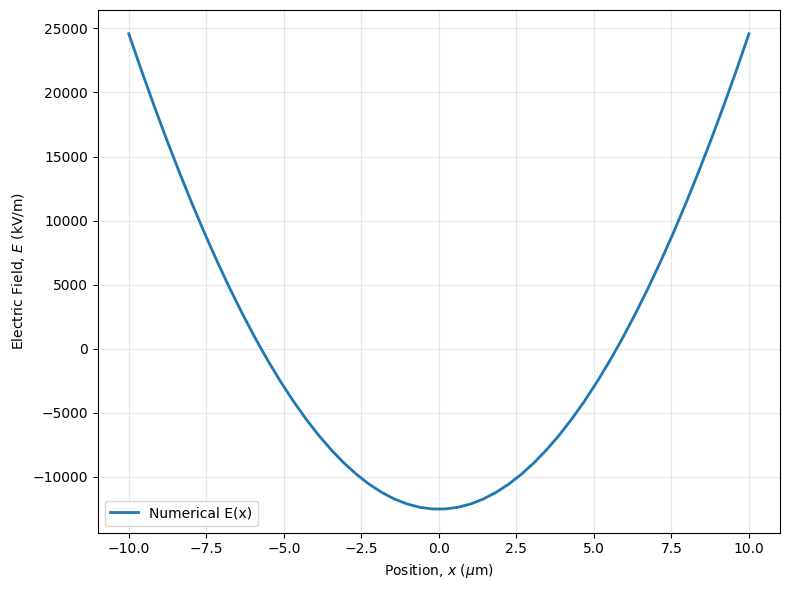

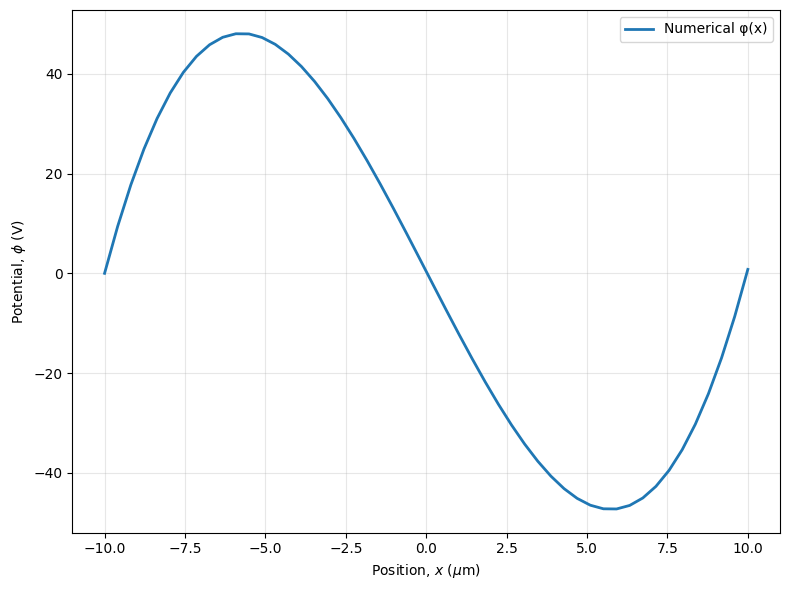

In [14]:
import sys
import os
import numpy as np
import matplotlib.pyplot as plt
os.environ["PYTHONDONTWRITEBYTECODE"] = "1"  # Prevent .pyc files
base_dir = os.path.abspath(os.path.join(os.path.dirname(os.getcwd()), 'code'))
sys.path.append(base_dir)
from poisson_solver import poisson_solver
plots_dir = os.path.abspath(os.path.join(os.path.dirname(os.getcwd()), 'plots'))
os.makedirs(plots_dir, exist_ok=True)
print(f"Using poisson_solver from: {os.path.join(base_dir, 'poisson_solver.py')}")
# Parameters
N_a = N_d = 1e16 * 1e6  # cm^-3 to m^-3
V_bi = 0.791  # V
x = np.linspace(-1e-5, 1e-5, 50)  # Very coarse mesh
try:
    E, phi = poisson_solver(N_a, N_d, V_bi, x=x, delta=2e-5)
    plt.figure(figsize=(8, 6))
    plt.plot(x * 1e6, E / 1e3, linewidth=2, label='Numerical E(x)')
    plt.xlabel('Position, $x$ ($\\mu$m)')
    plt.ylabel('Electric Field, $E$ (kV/m)')
    plt.grid(True, alpha=0.3)
    plt.legend()
    plt.tight_layout()
    plt.savefig(os.path.join(plots_dir, 'E_numerical.png'), dpi=300, bbox_inches='tight')
    plt.show()
    
    plt.figure(figsize=(8, 6))
    plt.plot(x * 1e6, phi, linewidth=2, label='Numerical φ(x)')
    plt.xlabel('Position, $x$ ($\\mu$m)')
    plt.ylabel('Potential, $\\phi$ (V)')
    plt.grid(True, alpha=0.3)
    plt.legend()
    plt.tight_layout()
    plt.savefig(os.path.join(plots_dir, 'phi_numerical.png'), dpi=300, bbox_inches='tight')
    plt.show()
except Exception as e:
    print(f"Error: {e}")